In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import animation, rc
from IPython.display import HTML

In [2]:
from scipy.signal import find_peaks_cwt
from matplotlib.cm import get_cmap

def find_peaks(f):
    peaks = find_peaks_cwt(f, np.ones(len(f))*5.)
    return peaks[1:-1], f[peaks][1:-1]


def integrate(I):
    M = np.tril(np.ones((len(I), len(I))))
    return np.dot(M,I)

def phi(f, phi_zero=0., dt=1.):
    return phi_zero + 2.*np.pi*integrate(f)*dt

# Oscillatory models of place and grid cell firing

> Lengyel et al. (2003), _Dynamically detuned oscillations account for the coupled rate and temporal code of place cell firing_.

Below is an implementation of the dynamics in the appendix


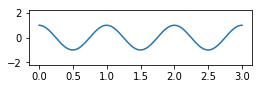

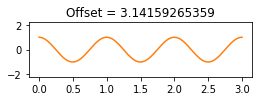

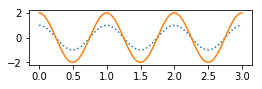

In [3]:
t = np.linspace(0.,3.,num=1000)
dt = (t[-1] - t[0])/1000.



f_som = np.ones(len(t))

offset = np.pi

osc_som =  np.cos(phi(f_som, 0., dt))
osc_den =  np.cos(phi(f_som, np.pi + offset, dt))


figsize=(4,1)
ylim = [-2.2,2.2]

plt.figure(figsize=figsize)
plt.ylim(*ylim)
plt.plot(t, osc_den)
plt.show()

plt.figure(figsize=figsize)
plt.ylim(*ylim)
plt.title("Offset = {}".format(offset))
plt.plot(t, osc_som, linestyle="none")
plt.plot(t, osc_den )
plt.show()

plt.figure(figsize=figsize)
plt.ylim(*ylim)
plt.plot(t, osc_som, linestyle=":")
plt.plot(t, osc_som + osc_den)
# peaks, vals = find_peaks(osc_som)
# for peak in peaks:
#     plt.axvline(t[peak], alpha=0.1, c="C0")
# peaks, vals = find_peaks(osc_som + osc_den)
# for peak in peaks:
#     plt.axvline(t[peak], alpha=0.1, c="C1")
plt.show()

In [4]:
ps = []

firing_phase = []
firing_rate  = []
offsets = np.linspace(0., 2.*np.pi, num=30, endpoint=True)
osc_s = []
osc_d = []
for offset in offsets:
    
    osc_som =  1.*np.cos(phi(f_som, 0., dt))
    osc_den =  1.*np.cos(phi(f_som, np.pi + offset, dt))
    osc_s.append(osc_som)
    osc_d.append(osc_den)
    signal = osc_som + osc_den
    peaks, vals = find_peaks(signal)
    firing_rate.append( np.mean(signal[peaks]) )
    firing_phase.append((  t[peaks][0] + 0.5)%1)



firing_rate = np.array(firing_rate)
firing_phase = np.array(firing_phase)


/Users/mklukas/Library/Python/2.7/lib/python/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


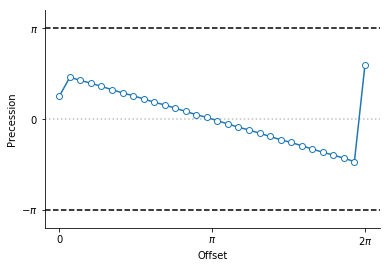

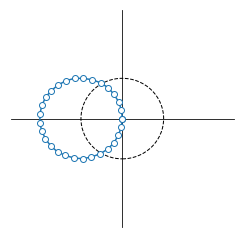

In [5]:
fig, ax = plt.subplots()


plt.ylim(-0.1,1.1)
plt.axhline(y=0., color="black", linestyle='--')
plt.axhline(y=1., color="black", linestyle='--')
plt.axhline(y=.5, color="silver", linestyle=':')
plt.plot(offsets, firing_phase, marker="o", linestyle="-", markerfacecolor="white")
ax.spines['top'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xlabel("Offset")
plt.ylabel("Precession")
plt.xlim(-0.3,np.pi*2 + 0.3)
plt.xticks([0, np.pi, np.pi*2],["0", "$\pi$","$2\pi$"])
plt.yticks([0,0.5,1], ["$-\pi$","$0$","$\pi$"])
plt.show()


fig, ax = plt.subplots(figsize=(4,4))
plt.xlim(-2.7,2.7)
plt.ylim(-2.7,2.7)
# ax.axis('off')
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xticks([])
plt.yticks([])

circle = plt.Circle((0, 0), 1., color='black', fill=False, linestyle="--")
ax.add_artist(circle)
# plt.scatter( firing_rate*np.cos(firing_phase), firing_rate*np.sin(firing_phase), facecolor="white", edgecolor="C0" )
plt.plot( firing_rate*np.cos(firing_phase*2*np.pi), firing_rate*np.sin(firing_phase*2*np.pi), 
         marker="o", 
         c="C0",
         linestyle="-", 
         markerfacecolor="white",zorder=100)
plt.scatter(0,0, c="black", marker=".")

# Neuronal response animation

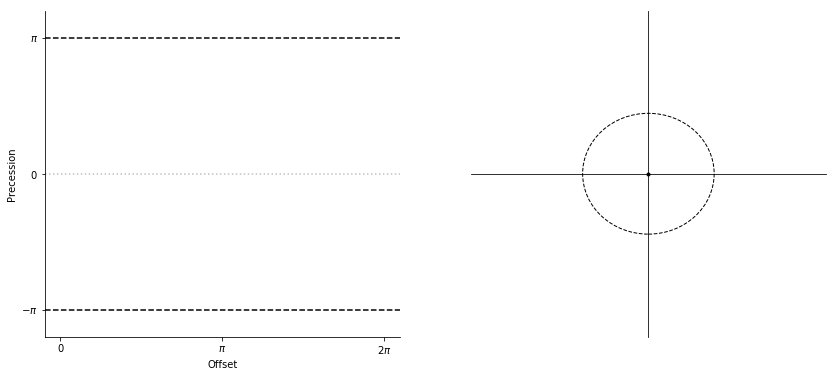

In [62]:
from matplotlib import animation, rc
from IPython.display import HTML

fig, (ax0, ax1) = plt.subplots(1,2, figsize=(14,6))

ax0.set_ylim(-0.1,1.1)
ax0.axhline(y=0., color="black", linestyle='--')
ax0.axhline(y=1., color="black", linestyle='--')
ax0.axhline(y=.5, color="silver", linestyle=':')

ax0.spines['top'].set_visible(False)

ax0.spines['right'].set_visible(False)

ax0.set_xlabel("Offset")
ax0.set_ylabel("Precession")
ax0.set_xlim(-0.3,np.pi*2 + 0.3)
ax0.set_xticks([0, np.pi, np.pi*2])
ax0.set_xticklabels(["0", "$\pi$","$2\pi$"])
ax0.set_yticks([0,0.5,1])
ax0.set_yticklabels(["$-\pi$","$0$","$\pi$"])


line0, = ax0.plot([], [], marker="o", linestyle="-", markerfacecolor="white")

# ------------------------------------

ax1.set_xlim(-2.7,2.7)
ax1.set_ylim(-2.7,2.7)

ax1.spines['left'].set_position('center')
ax1.spines['bottom'].set_position('center')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.set_xticks([])
ax1.set_yticks([])

circle = plt.Circle((0, 0), 1., color='black', fill=False, linestyle="--")
ax1.add_artist(circle)
ax1.scatter(0,0, c="black", marker=".")

line1, = ax1.plot( [], [], 
         marker="o", 
         c="C0",
         linestyle="-", 
         markerfacecolor="white",zorder=100)




In [63]:
def init():
    line0.set_data([], [])
    line1.set_data([], [])
    return (line0, line1)


# animation function. This is called sequentially
def animate(i):    
    line0.set_data(offsets[:i], firing_phase[:i])
    line1.set_data( firing_rate[:i]*np.cos(firing_phase[:i]*2*np.pi), firing_rate[:i]*np.sin(firing_phase[:i]*2*np.pi))
    return (line0, line1)

In [64]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=len(offsets)+1, interval=200, blit=True)

HTML(anim.to_html5_video())

# Oscillation animation 

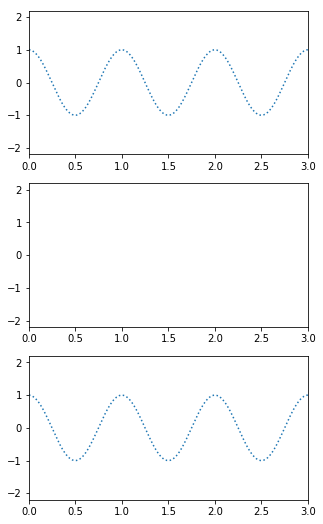

In [65]:
### 



fig, (ax0, ax1, ax2) = plt.subplots(3,1, figsize=(5,9), sharey=False)

ylim = [-2.2,2.2]

# ax0.set_xticks([])
# ax1.set_xticks([])
ax0.set_ylim(*ylim)
ax1.set_ylim(*ylim)
ax2.set_ylim(*ylim)
ax0.set_xlim(t[0],t[-1])
ax1.set_xlim(t[0],t[-1])
ax2.set_xlim(t[0],t[-1])


ax0.plot(t, osc_s[0], linestyle=":")
ax2.plot(t, osc_s[0], linestyle=":")

line0, = ax0.plot([], [], label="$\psi_d = \cos(\phi_{s} + \pi + I )$")
line1, = ax1.plot([], [], label="$\psi_s =\cos(\phi_{s})$")
line2, = ax2.plot([], [], label="$\psi_s + \psi_d$")

# ax0.legend()
# ax1.legend()
# ax2.legend()

In [66]:
def init():
    line0.set_data([], [])
#     line1.set_data([], [])
#     line2.set_data([], [])
    return (line0, line1, line2)


# animation function. This is called sequentially
def animate(i):    
    line1.set_data(t, osc_s[i])
    line0.set_data(t, osc_d[i])
    line2.set_data(t, osc_s[i] +  osc_d[i])
    return (line0, line1, line2)


print t.shape, osc_d[0].shape, len(osc_d)
# plt.plot(t,osc_s[1])

(1000,) (1000,) 30


In [67]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=len(osc_s), interval=200, blit=False)

HTML(anim.to_html5_video())